# Some more advanced numpy/matplotlib stuff related to basic tutorial 

* JS (jserences@ucsd.edu), June 2022 for CSHL

* TOC: 
    * generating random numbers from a normal distribution (can extend to other distributions as well)
        * also includes demo of interacting with ax and hist using matplotlib
    * upcasting when combining different data types
    * set logic
    * concatenating, or stacking, arrays
    * fancy indexing (using an array to index into another array - and yes, it really is called fancy indexing)
    * shape manipulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Numpy random.randn: random draws from a normal distribution N(0,1)...i.e., mean 0 and variance 1. 
* To change mean(m) and variance (v), use: m + (np.random.randn(x) * np.sqrt(v)) where x is the number of draws

In [2]:
# define number of samples
x = 100000

# drawn from normal with mean 0 and variance 1
randn_array = np.random.randn(x)  
print(f'Mean: {np.mean(randn_array)}, Var: {np.var(randn_array)}')

# drawn from normal with mean 10 and variance 3
m = 10
v = 3
randn_array = m + (np.random.randn(x) * np.sqrt(v)) 
print(f'Mean: {np.mean(randn_array)}, Var: {np.var(randn_array)}')


Mean: -0.0038742357168859566, Var: 0.9961975971973596
Mean: 9.992436074451753, Var: 3.013250266348945


## Use randn to generate draws from a normal distribtion with mean = mu and std = sig and then plot a histogram

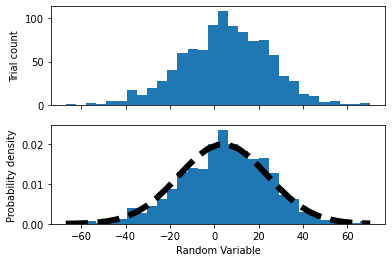

In [3]:
# shift the mean and scale the variance for a N(mu,var)
samples = 1000
mu = 4
sig = 20
num_bins = 30

# generate the array of rand numbers 
rand_array = mu + (sig * np.random.randn(samples))   # drawn from normal with mean mu and variance sig

# make multiple axes...
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

# generate the histogram, note density == 1 (so unit area)
ax1.hist(rand_array, num_bins, density=0)
ax1.set_ylabel('Trial count')

# generate a pdf evaled at 'bins' to draw a smooth function - this works because we used randn to generate the data
n, bins, patches = ax2.hist(rand_array, num_bins, density=1)

y = norm.pdf(bins, mu, sig)
ax2.plot(bins, y, 'k--', linewidth = 6)
ax2.set_xlabel('Random Variable')
ax2.set_ylabel('Probability density')

# show the plot
plt.show()

## When dealing with muliple arrays of different data types, resulting array will take the form of the highest precision input array (upcasting)...

In [4]:
x = np.arange(10, dtype='int32')
print('x data type: ', x.dtype)

y = np.random.randn(1,10)
print('y data type: ', y.dtype)

# now multiply the int32 array with the float64 array and answer should be the higher precision of the two (float64)
z = x * y 
print(z)
print('z data type: ', z.dtype)

x data type:  int32
y data type:  float64
[[-0.          0.0656192  -0.04593141  2.07239602  0.55127538  1.43422313
  -0.51088881  6.30205256 -4.0172986   3.35095977]]
z data type:  float64


## Set logic...unions, intersections, unique
* combine all unique elements across sets, find overlap, find unique elements in array, etc...

In [5]:
x = np.arange(20)
y = np.linspace(0, 20, 21)
print(x)
print(y)

z = np.union1d(x,y)
print(z)

z = np.intersect1d(x,y)
print(z)

z = np.unique([np.append(x,y)])
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


## Iterating over numpy arrays
* goes down first dim (rows)
* can use ndarray.flat method to flatten ND array in 1D array

In [6]:
x = np.random.randn(2,3)
print(x)
print('\n')
for c,i in enumerate(x):
    print('Row', str(c), i)

[[-0.02467046 -0.22388641  0.52925487]
 [-1.31805773  0.61306662  0.69206599]]


Row 0 [-0.02467046 -0.22388641  0.52925487]
Row 1 [-1.31805773  0.61306662  0.69206599]


In [7]:
# can also iterate over all entries in the array using 'flat'
# will proceed along 1st row, then to 2nd row, etc.
x = np.random.rand(2,4,3)
print(x.shape)
for a in x.flat:
    print(a)

(2, 4, 3)
0.4826819998445526
0.5418327659482125
0.3345984082061646
0.2955094825569796
0.27183329168865633
0.49329320883411576
0.6080753477609833
0.8711987920192734
0.32836886510533925
0.6764589448783156
0.4775722819966197
0.1734888105376693
0.4550665279307953
0.41607831774603576
0.8466383406227028
0.25083002967528367
0.4610998023207492
0.8309260983581103
0.7674752272358377
0.5024954710292955
0.2453425081303906
0.286833413817832
0.020482451426460657
0.05314820054248137


## Concatenating arrays (stacking)

In [8]:
# use floor and ceil to make two 5x6 arrays of rand numbers
x = np.floor(np.random.rand(5,6)*10)
y = np.ceil(np.random.rand(5,6)*2)

# vertical stacking of arrays...will make a 10x6
z = np.vstack((x,y))
print('shape of z after vert stacking x,y: ', z.shape)

# horizontal stacking of arrays...will make a 5x12
z = np.hstack((x,y))
print('shape of z after horizontal stacking x,y: ', z.shape)

# column stacking of arrays...will make a 5x12
z = np.column_stack((x,y))
print('shape of z after column stacking x,y: ', z.shape)

# concatenate allows stacking along specified dim
z = np.concatenate((x,y),axis=0)   # vstack - stack rows on top of each other
print('shape of z after vertical concat x,y: ', z.shape)

z = np.concatenate((x,y),axis=1)   # hstack - stack columns next to each other
print('shape of z after horizontal concat x,y: ', z.shape)

shape of z after vert stacking x,y:  (10, 6)
shape of z after horizontal stacking x,y:  (5, 12)
shape of z after column stacking x,y:  (5, 12)
shape of z after vertical concat x,y:  (10, 6)
shape of z after horizontal concat x,y:  (5, 12)


## Fancy indexing...using arrays to index arrays - used all the time in data analysis...
* fancy indexing always makes a COPY of the data (unlike slicing which creates a view)!!! 

In [9]:
# define an array
x = np.random.rand(3,4)

print(x)

# index array - can be a tuple, in this case to pull out the lower right entry
y = (2,3)

# index
x[y]

[[0.81233535 0.839211   0.29288193 0.59397874]
 [0.55553384 0.5292957  0.56503646 0.03998785]
 [0.34617365 0.87559319 0.83379644 0.20204789]]


0.20204789016720826

In [10]:
# this will extract the 3rd row, then the 2nd row, then the first row (flipud)
print(x[[2,1,0]])

[[0.34617365 0.87559319 0.83379644 0.20204789]
 [0.55553384 0.5292957  0.56503646 0.03998785]
 [0.81233535 0.839211   0.29288193 0.59397874]]


In [11]:
# or can pass in multiple arrays...will return a 1D array 
# corresponding to each set of tuples (1,1) and (2,2) in this case
print(x)
x[[1,2],[1,2]]

[[0.81233535 0.839211   0.29288193 0.59397874]
 [0.55553384 0.5292957  0.56503646 0.03998785]
 [0.34617365 0.87559319 0.83379644 0.20204789]]


array([0.5292957 , 0.83379644])

## Additional methods for shape manipulation

In [12]:
x = np.round(np.random.randn(6,8)*5)   # generate some random data from N(0,5), then round 
print(x)

# flatten the array
y = x.ravel()   
print('Shape of x: ', x.shape, '\nShape of flattened x:', y.shape)  # newline example + multiple outputs...

# reshape
x = x.reshape(12,4)   # 48 element array reshaped from a 6x8 to a 12x4

# transpose - swap row/column
print(x.T)
print('Reshaped x: ', x.shape, '\nReshaped x transposed: ', x.T.shape)

[[ -2.  -2.  -2.   1.  -3.   2.  -9.  -5.]
 [ -0.  -3.  -5.  10.   3. -10.  10.   2.]
 [ -8.   3.  -1.  -1.  -2.  -3.   2.  -6.]
 [ -7.   3.  -2.   1.  -6.   0.   1.  -5.]
 [  2.  -2.   7.  -5.   9.   1.  -6.  -3.]
 [  3.   1.  -6.  -4.  -7.  -2.  10.  -2.]]
Shape of x:  (6, 8) 
Shape of flattened x: (48,)
[[ -2.  -3.  -0.   3.  -8.  -2.  -7.  -6.   2.   9.   3.  -7.]
 [ -2.   2.  -3. -10.   3.  -3.   3.   0.  -2.   1.   1.  -2.]
 [ -2.  -9.  -5.  10.  -1.   2.  -2.   1.   7.  -6.  -6.  10.]
 [  1.  -5.  10.   2.  -1.  -6.   1.  -5.  -5.  -3.  -4.  -2.]]
Reshaped x:  (12, 4) 
Reshaped x transposed:  (4, 12)
